In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-13/06-04-41/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. <d0>: 0.6778
	2. azure: 0.1172
	3. cyan: 0.0879
	4. is: 0.0734
	5. blue: 0.0674
	6. round: 0.0635
	7. quadratic: 0.0631
	8. green: 0.0621
	9. corner: 0.0595
	10. lime: 0.0584
	11. outline: 0.0545
	12. figure: 0.0486
	13. angle: 0.0469
	14. olive: 0.0441
	15. four: 0.0412
	16. rotate: 0.0378
	17. with: 0.0313
	18. triangular: 0.0301
	19. form: 0.0259
	20. in: 0.0259
	21. have: 0.0246
	22. position: 0.0246
	23. this: 0.0236
	24. turn: 0.0228
	25. three: 0.0218
	26. left: 0.0217
	27. unturn: 0.0203
	28. shade: 0.0197
	29. blank: 0.0188
	30. shape: 0.0156
	31. unrotate: 0.0138
	32. photo: 0.0135
	33. up: 0.0130
	34. static: 0.0112
	35. color: 0.0111
	36. transparent: 0.0102
	37. crimson: 0.0095
	38. no: 0.0092
	39. picture: 0.0086
	40. the: 0.0078
	41. scarlet: 0.0073
	42. bottom: 0.0071
	43. canvas: 0.0062
	44. right: 0.0059
	45. fix: 0.0058
	46. circular: 0.0056
	47. image: 0.0050
	48. that: 0.0050
	49. red: 0.0048
	50. white: 

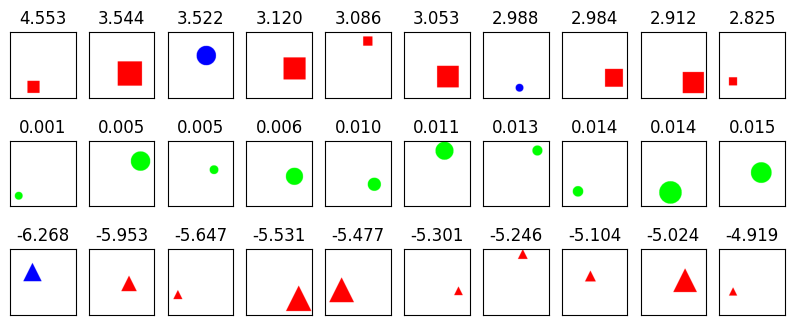

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. <d1>: 0.2405
	2. red: 0.2388
	3. scarlet: 0.1728
	4. olive: 0.1494
	5. green: 0.1220
	6. three: 0.1218
	7. crimson: 0.1201
	8. turn: 0.1067
	9. unturn: 0.1029
	10. this: 0.0955
	11. that: 0.0905
	12. image: 0.0875
	13. lime: 0.0856
	14. figure: 0.0817
	15. right: 0.0804
	16. static: 0.0750
	17. corner: 0.0724
	18. fix: 0.0688
	19. position: 0.0687
	20. angle: 0.0663
	21. is: 0.0646
	22. photo: 0.0620
	23. form: 0.0604
	24. left: 0.0591
	25. four: 0.0575
	26. outline: 0.0574
	27. blue: 0.0573
	28. cyan: 0.0566
	29. rotate: 0.0503
	30. have: 0.0499
	31. color: 0.0488
	32. background: 0.0466
	33. unrotate: 0.0455
	34. shade: 0.0450
	35. locate: 0.0444
	36. the: 0.0393
	37. round: 0.0310
	38. solid: 0.0297
	39. transparent: 0.0295
	40. quadratic: 0.0270
	41. canvas: 0.0267
	42. no: 0.0265
	43. circular: 0.0251


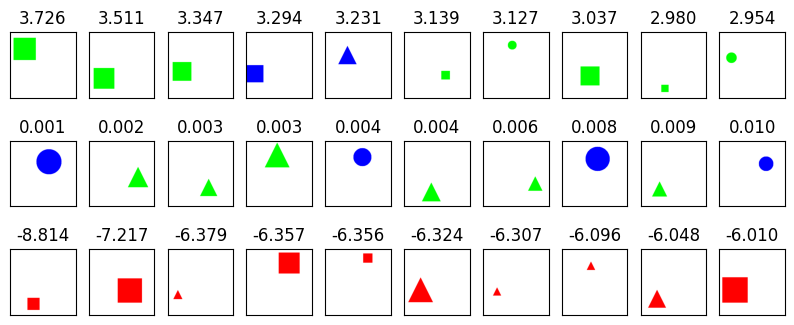

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. <d2>: 0.7835
	2. azure: 0.1841
	3. quadratic: 0.1172
	4. round: 0.1132
	5. is: 0.0862
	6. cyan: 0.0755
	7. blue: 0.0642
	8. corner: 0.0480
	9. triangular: 0.0464
	10. with: 0.0385
	11. four: 0.0284
	12. green: 0.0266
	13. outline: 0.0243
	14. angle: 0.0237
	15. have: 0.0235
	16. in: 0.0212
	17. lime: 0.0192
	18. figure: 0.0180
	19. rotate: 0.0162
	20. olive: 0.0125
	21. form: 0.0086
	22. blank: 0.0067
	23. position: 0.0062
	24. shape: 0.0054
	25. shade: 0.0050
	26. left: 0.0047
	27. this: 0.0046
	28. unrotate: 0.0043
	29. unturn: 0.0039
	30. turn: 0.0034
	31. photo: 0.0032
	32. bottom: 0.0029
	33. up: 0.0027
	34. no: 0.0022
	35. static: 0.0019
	36. transparent: 0.0017
	37. three: 0.0016
	38. color: 0.0013
	39. picture: 0.0012
	40. circular: 0.0010
	41. right: 0.0007
	42. canvas: 0.0007
	43. the: 0.0006
	44.

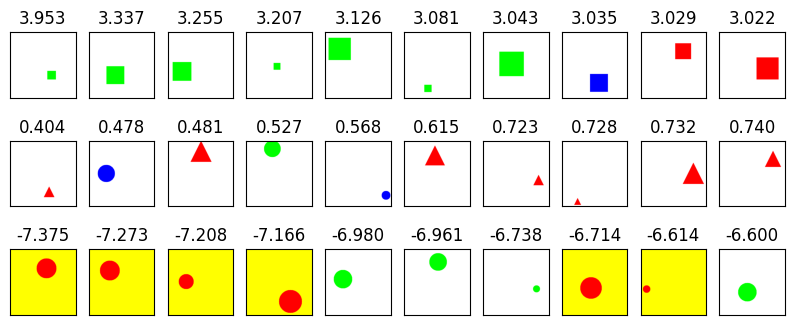

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. <d3>: 0.7863
	2. quadratic: 0.0913
	3. four: 0.0902
	4. round: 0.0710
	5. with: 0.0577
	6. corner: 0.0572
	7. is: 0.0424
	8. green: 0.0414
	9. angle: 0.0404
	10. lime: 0.0393
	11. azure: 0.0383
	12. triangular: 0.0382
	13. have: 0.0350
	14. outline: 0.0281
	15. olive: 0.0274
	16. in: 0.0255
	17. cyan: 0.0234
	18. rotate: 0.0205
	19. figure: 0.0151
	20. blue: 0.0143
	21. form: 0.0139
	22. position: 0.0136
	23. unrotate: 0.0117
	24. unturn: 0.0111
	25. left: 0.0105
	26. photo: 0.0084
	27. static: 0.0074
	28. turn: 0.0073
	29. shape: 0.0068
	30. right: 0.0066
	31. no: 0.0061
	32. this: 0.0053
	33. blank: 0.0053
	34. bottom: 0.0050
	35. shade: 0.0047
	36. up: 0.0039
	37. circular: 0.0038
	38. picture: 0.0031
	39. color: 0.0026
	40. canvas: 0.0026
	41. transparent: 0.0020
	42. fix: 0.0018
	43. three: 0.0016
	44.

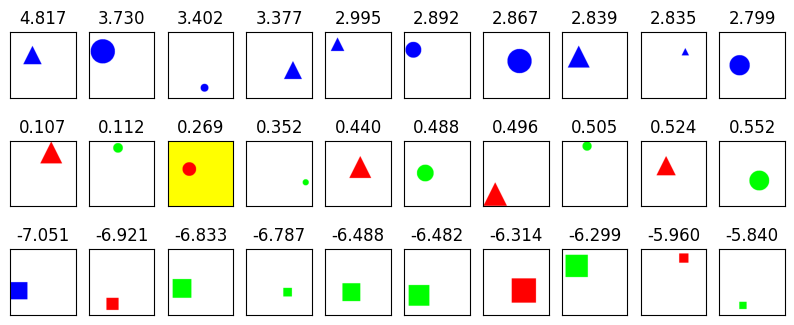

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. <d4>: 0.6513
	2. lime: 0.1433
	3. green: 0.1280
	4. is: 0.1218
	5. olive: 0.1008
	6. corner: 0.0717
	7. three: 0.0715
	8. figure: 0.0656
	9. quadratic: 0.0608
	10. cyan: 0.0581
	11. angle: 0.0523
	12. turn: 0.0422
	13. outline: 0.0408
	14. round: 0.0379
	15. blue: 0.0371
	16. this: 0.0363
	17. have: 0.0350
	18. azure: 0.0336
	19. form: 0.0330
	20. rotate: 0.0268
	21. scarlet: 0.0266
	22. left: 0.0261
	23. red: 0.0259
	24. four: 0.0240
	25. unturn: 0.0208
	26. position: 0.0178
	27. crimson: 0.0153
	28. with: 0.0131
	29. static: 0.0124
	30. shade: 0.0124
	31. right: 0.0101
	32. photo: 0.0100
	33. unrotate: 0.0094
	34. fix: 0.0091
	35. triangular: 0.0088
	36. color: 0.0079
	37. that: 0.0077
	38. in: 0.0074
	39. blank: 0.0072
	40. the: 0.0068
	41. image: 0.0061
	42. transparent: 0.0061
	43. shape: 0.0051
	44. u

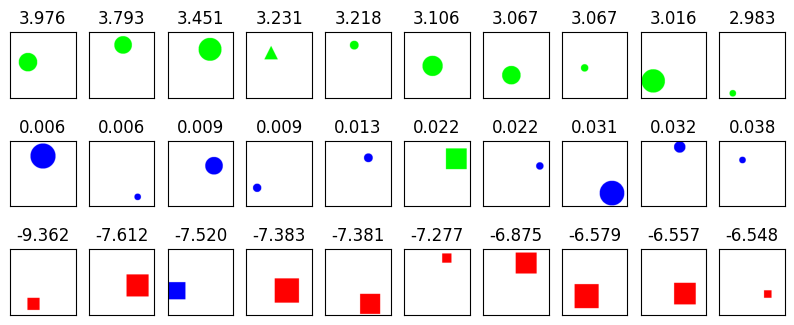

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. <d5>: 0.6710
	2. green: 0.0872
	3. quadratic: 0.0871
	4. lime: 0.0778
	5. olive: 0.0728
	6. is: 0.0686
	7. four: 0.0631
	8. round: 0.0612
	9. corner: 0.0605
	10. angle: 0.0584
	11. azure: 0.0522
	12. outline: 0.0514
	13. cyan: 0.0473
	14. with: 0.0468
	15. figure: 0.0386
	16. have: 0.0384
	17. rotate: 0.0373
	18. form: 0.0343
	19. blue: 0.0294
	20. position: 0.0272
	21. in: 0.0260
	22. triangular: 0.0250
	23. unturn: 0.0245
	24. left: 0.0239
	25. turn: 0.0230
	26. this: 0.0224
	27. unrotate: 0.0178
	28. three: 0.0170
	29. static: 0.0167
	30. photo: 0.0146
	31. shape: 0.0145
	32. shade: 0.0135
	33. right: 0.0129
	34. blank: 0.0127
	35. no: 0.0107
	36. up: 0.0095
	37. color: 0.0094
	38. crimson: 0.0083
	39. scarlet: 0.0082
	40. circular: 0.0077
	41. picture: 0.0075
	42. fix: 0.0072
	43. transparent: 0.0070
	4

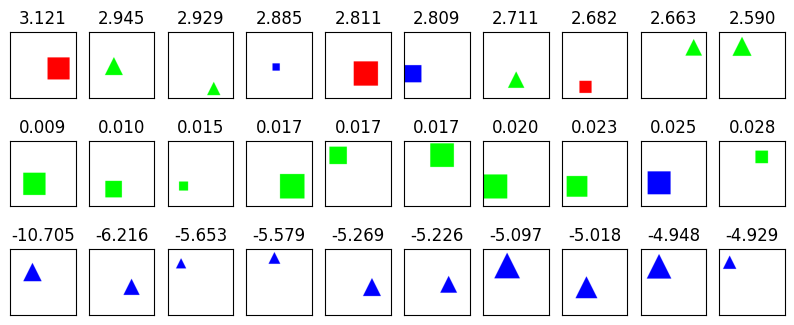

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. <d6>: 0.3154
	2. four: 0.0822
	3. triangular: 0.0769
	4. in: 0.0750
	5. with: 0.0678
	6. outline: 0.0650
	7. rotate: 0.0645
	8. position: 0.0640
	9. unrotate: 0.0637
	10. have: 0.0635
	11. round: 0.0623
	12. photo: 0.0599
	13. angle: 0.0591
	14. quadratic: 0.0590
	15. blank: 0.0583
	16. bottom: 0.0576
	17. shape: 0.0569
	18. shade: 0.0555
	19. corner: 0.0554
	20. left: 0.0551
	21. no: 0.0541
	22. up: 0.0534
	23. figure: 0.0531
	24. circular: 0.0529
	25. azure: 0.0517
	26. lime: 0.0513
	27. picture: 0.0512
	28. unturn: 0.0505
	29. form: 0.0498
	30. static: 0.0480
	31. canvas: 0.0470
	32. blue: 0.0462
	33. transparent: 0.0444
	34. color: 0.0444
	35. cyan: 0.0434
	36. right: 0.0433
	37. turn: 0.0432
	38. this: 0.0427
	39. olive: 0.0418
	40. green: 0.0403
	41. is: 0.0371
	42. fix: 0.0362
	43. that: 0.0350
	44. 

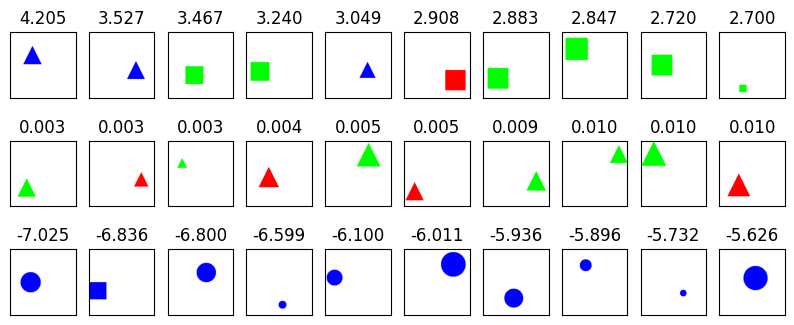

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. <d7>: 0.6106
	2. is: 0.1259
	3. round: 0.1158
	4. quadratic: 0.1033
	5. cyan: 0.1001
	6. blue: 0.0978
	7. corner: 0.0927
	8. azure: 0.0774
	9. have: 0.0636
	10. green: 0.0597
	11. angle: 0.0597
	12. triangular: 0.0551
	13. four: 0.0545
	14. figure: 0.0530
	15. lime: 0.0504
	16. outline: 0.0483
	17. with: 0.0414
	18. olive: 0.0394
	19. rotate: 0.0366
	20. form: 0.0302
	21. in: 0.0237
	22. position: 0.0234
	23. this: 0.0233
	24. turn: 0.0217
	25. unturn: 0.0216
	26. left: 0.0200
	27. shade: 0.0185
	28. unrotate: 0.0174
	29. photo: 0.0169
	30. blank: 0.0165
	31. three: 0.0131
	32. static: 0.0126
	33. shape: 0.0112
	34. no: 0.0099
	35. up: 0.0095
	36. transparent: 0.0086
	37. color: 0.0084
	38. right: 0.0080
	39. bottom: 0.0075
	40. crimson: 0.0072
	41. scarlet: 0.0068
	42. red: 0.0066
	43. circular: 0.0056
	44

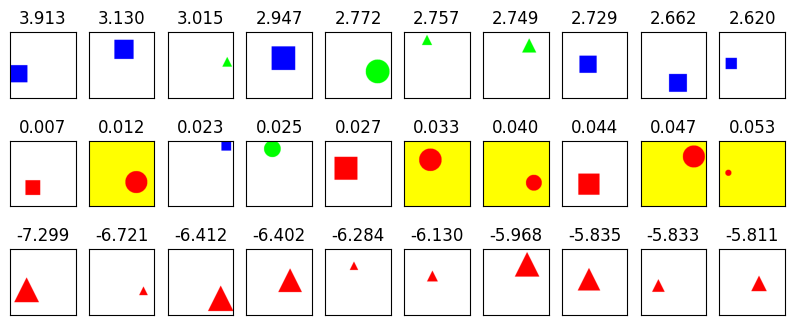

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. white: 0.1013
	2. solid: 0.0990
	3. background: 0.0945
	4. canvas: 0.0944
	5. locate: 0.0940
	6. circular: 0.0911
	7. the: 0.0896
	8. picture: 0.0889
	9. fix: 0.0858
	10. transparent: 0.0854
	11. up: 0.0827
	12. bottom: 0.0825
	13. no: 0.0805
	14. shape: 0.0796
	15. image: 0.0793
	16. color: 0.0790
	17. right: 0.0787
	18. that: 0.0766
	19. static: 0.0732
	20. unrotate: 0.0727
	21. left: 0.0724
	22. photo: 0.0706
	23. blank: 0.0701
	24. in: 0.0674
	25. triangular: 0.0674
	26. shade: 0.0666
	27. crimson: 0.0654
	28. form: 0.0649
	29. position: 0.0642
	30. turn: 0.0605
	31. unturn: 0.0594
	32. with: 0.0589
	33. rotate: 0.0581
	34. this: 0.0581
	35. <d8>: 0.0566
	36. have: 0.0536
	37. three: 0.0532
	38. scarlet: 0.0528
	39. angle: 0.0465
	40. figure: 0.0459
	41. outline: 0.0455
	42. four: 0.0382
	43. lime: 0.03

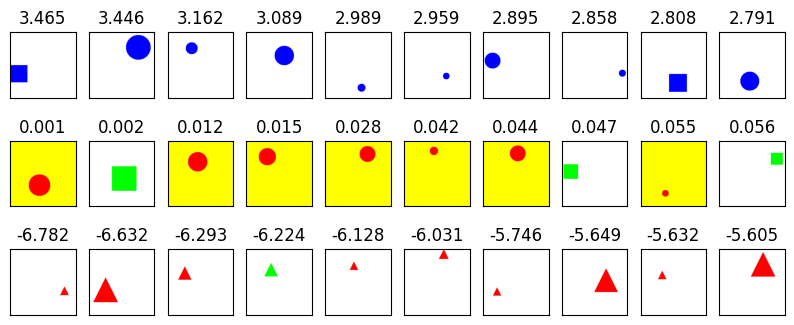

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. <d9>: 0.8231
	2. is: 0.1217
	3. cyan: 0.1098
	4. blue: 0.0999
	5. azure: 0.0917
	6. green: 0.0476
	7. round: 0.0472
	8. quadratic: 0.0466
	9. corner: 0.0396
	10. olive: 0.0251
	11. figure: 0.0239
	12. lime: 0.0214
	13. outline: 0.0192
	14. angle: 0.0134
	15. rotate: 0.0095
	16. have: 0.0081
	17. four: 0.0081
	18. this: 0.0071
	19. three: 0.0068
	20. triangular: 0.0059
	21. form: 0.0055
	22. with: 0.0050
	23. shade: 0.0043
	24. turn: 0.0041
	25. position: 0.0039
	26. blank: 0.0036
	27. in: 0.0030
	28. unturn: 0.0030
	29. left: 0.0029
	30. photo: 0.0016
	31. shape: 0.0015
	32. unrotate: 0.0015
	33. transparent: 0.0012
	34. up: 0.0012
	35. color: 0.0010
	36. crimson: 0.0010
	37. static: 0.0010
	38. scarlet: 0.0009
	39. red: 0.0008
	40. the: 0.0007
	41. no: 0.0005
	42. bottom: 0.0004
	43. picture: 0.0004
	44. 

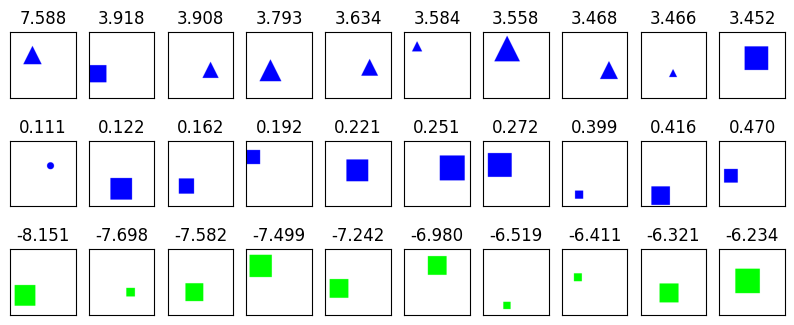

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. <d10>: 0.2883
	2. blank: 0.1011
	3. blue: 0.0979
	4. bottom: 0.0859
	5. shade: 0.0800
	6. shape: 0.0800
	7. in: 0.0726
	8. triangular: 0.0700
	9. round: 0.0700
	10. cyan: 0.0696
	11. up: 0.0682
	12. rotate: 0.0670
	13. quadratic: 0.0661
	14. outline: 0.0655
	15. azure: 0.0645
	16. transparent: 0.0631
	17. position: 0.0629
	18. with: 0.0597
	19. unrotate: 0.0583
	20. this: 0.0573
	21. have: 0.0572
	22. photo: 0.0562
	23. circular: 0.0547
	24. figure: 0.0524
	25. form: 0.0522
	26. color: 0.0510
	27. four: 0.0505
	28. no: 0.0498
	29. the: 0.0496
	30. picture: 0.0494
	31. olive: 0.0459
	32. is: 0.0437
	33. unturn: 0.0425
	34. white: 0.0425
	35. angle: 0.0421
	36. corner: 0.0403
	37. static: 0.0390
	38. left: 0.0387
	39. green: 0.0384
	40. that: 0.0366
	41. image: 0.0345
	42. crimson: 0.0328
	43. canvas: 0.0328

In [5]:
for i in range(11):
    visualize_concept(i)